In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Example: Load stock data (e.g., IBM)
IBM_stock_data = yf.download('IBM', start='2024-01-01', end='2025-01-02')

# Generate sine wave data
T = 500
time = np.linspace(0, 10, T)
sine_data = np.sin(time)

[*********************100%***********************]  1 of 1 completed


In [3]:
tesla_stock_data = yf.download('TSLA', start='2024-01-01', end='2024-11-02')

[*********************100%***********************]  1 of 1 completed


In [4]:
print(IBM_stock_data.head(3))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  162.830002  163.289993  160.460007  161.500000  157.093857   
2024-01-03  161.000000  161.729996  160.080002  160.100006  155.732056   
2024-01-04  160.220001  161.809998  160.169998  160.860001  156.471313   

             Volume  
Date                 
2024-01-02  3825000  
2024-01-03  4086100  
2024-01-04  3212000  


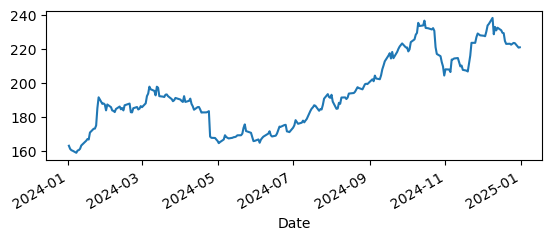

In [5]:
IBM_stock_data['Open'].plot(subplots=True, layout=(2,1));

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = IBM_stock_data[0:int(len(IBM_stock_data)*0.9)], IBM_stock_data[int(len(IBM_stock_data)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima

# make first prediction class
predictions = list()

model = ARIMA(history, order=(1,1,0))  # p, d, q values for ARIMA model 
# p = number of lag observations included in the model (AR)
# d = number of times that the raw observations are differenced
# q = size of the moving average window (MA)
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_5461/3335162576.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [7]:
model_fit.forecast(10)

array([216.39784022, 216.46968205, 216.47846203, 216.47953505,
       216.47966619, 216.47968222, 216.47968417, 216.47968441,
       216.47968444, 216.47968445])

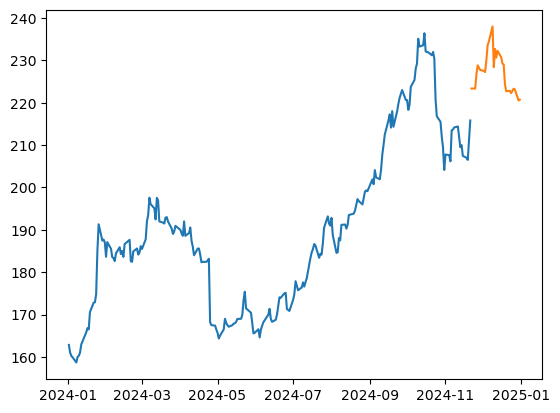

In [8]:
plt.plot(train_data['Open'])
plt.plot(test_data['Open'])
# plt.plot(history)

In [9]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/pq/ywh3rrys6n9dnn8yfd90rznm0000gn/T/ipykernel_5461/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [10]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 10.510941900483301
MAE: 2.2487353730713155
RMSE: 3.242058281475412


[*********************100%***********************]  1 of 1 completed


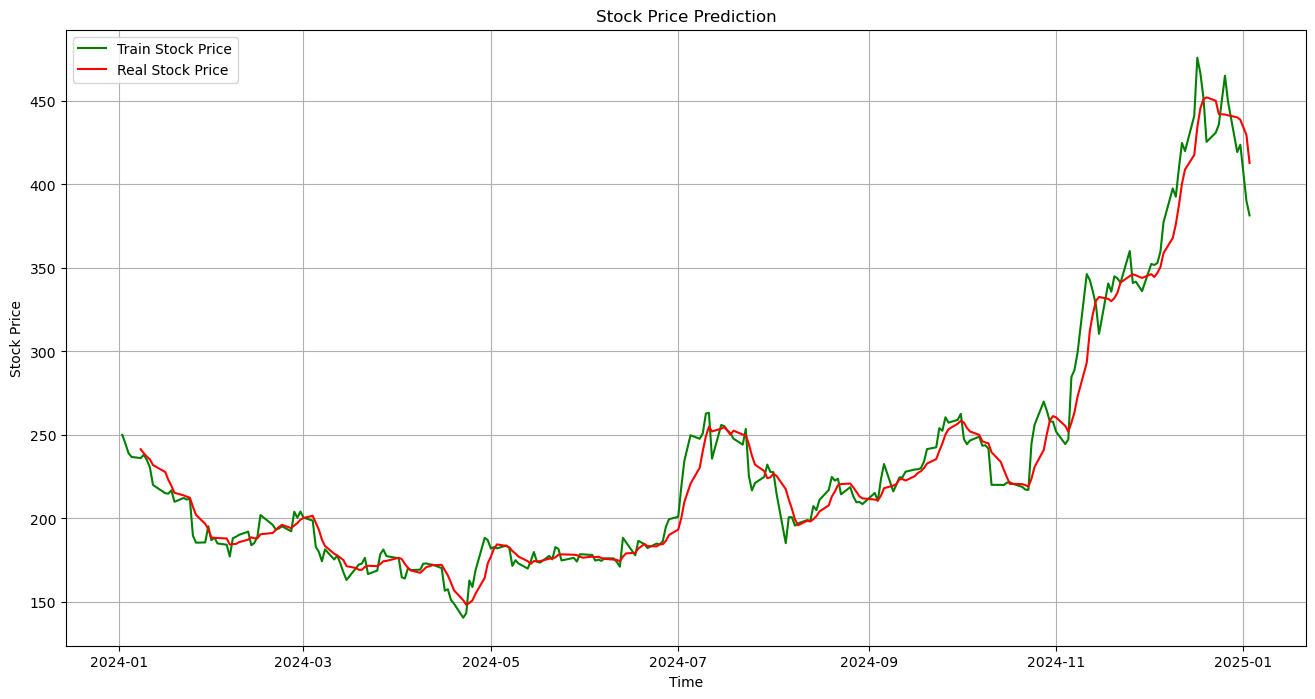

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tesla_stock_data = yf.download('TSLA', start='2024-01-01', end='2025-01-05')

# 임의의 predictions 데이터 생성 (예를 들어, 이동 평균을 예측으로 사용)
tesla_stock_data['Predictions'] = tesla_stock_data['Open'].rolling(window=5).mean()  # 단순 이동 평균 예측

# Plot 클래스 정의 (이미 코드에 정의되어 있다고 가정)
class Plot:
    def __init__(self, data, predictions):
        self.data = data
        self.predictions = predictions

    def plot(self):
        plt.figure(figsize=(16, 8))
        plt.plot(self.data.index[-600:], self.data['Open'].tail(600), color='green', label='Train Stock Price')
        plt.plot(self.predictions.index, self.predictions, color='red', label='Real Stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.grid(True)
        plt.savefig('arima_model.pdf')
        plt.show()

# Plot 클래스의 인스턴스 생성 및 적용
plot_instance = Plot(data=tesla_stock_data, predictions=tesla_stock_data['Predictions'])
plot_instance.plot()


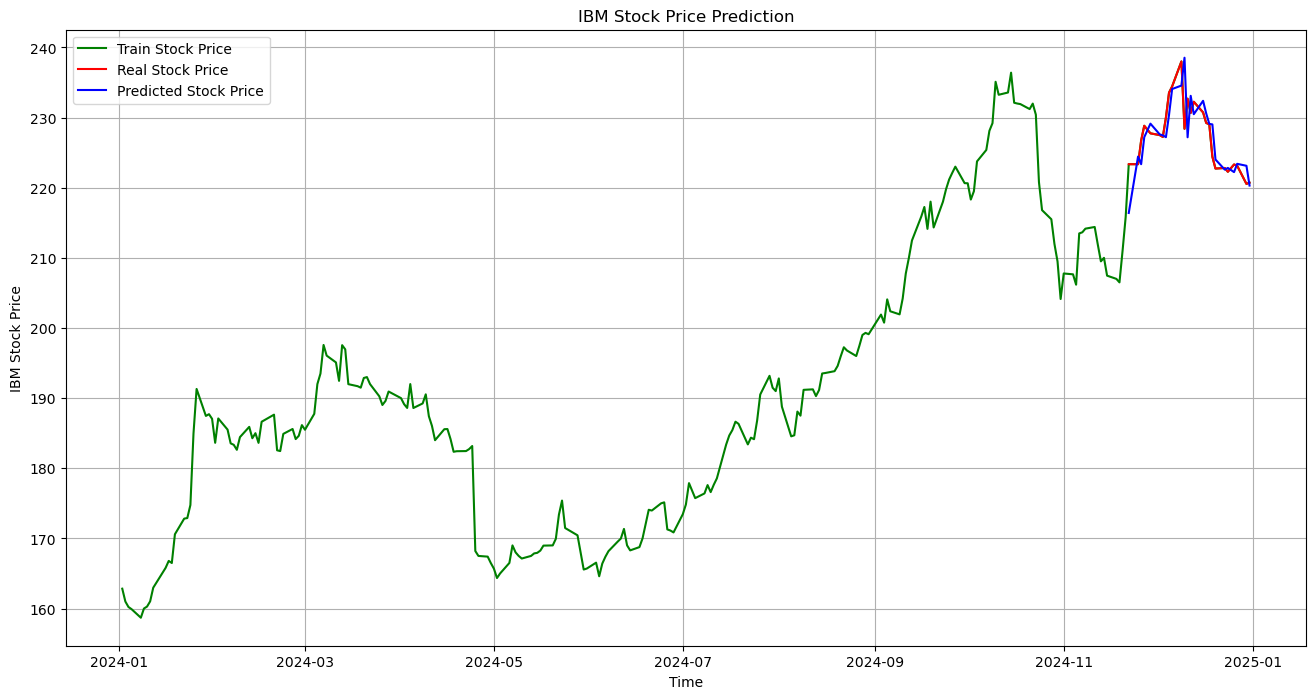

In [12]:
class plot :
    def __init__(self, data, predictions):
        self.data = data
        self.predictions = predictions
    def plot(self):
        plt.plot(self.data)
        plt.plot(self.predictions)
        plt.show()

plt.figure(figsize=(16,8))
plt.plot(IBM_stock_data.index[-600:], IBM_stock_data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

# 1. Moving Average (MA) model

In [13]:
def moving_average(data, q):
    """Compute the Moving Average (MA) model of order q."""
    ma_series = np.zeros_like(data)
    for t in range(q, len(data)):
        ma_series[t] = np.mean(data[t-q:t])
    return ma_series


# 2. Autoregression (AR) model 

In [14]:
def autoregression(data, p):
    """Compute the Autoregressive (AR) model of order p."""
    ar_series = np.zeros_like(data)
    for t in range(p, len(data)):
        ar_series[t] = np.dot(data[t-p:t][::-1], np.ones(p) / p)  # Averaged AR coefficients
    return ar_series


# 3.ARMA model

In [15]:
def arma(data, p, q):
    """Compute the ARMA model of order (p, q)."""
    ar_part = autoregression(data, p)
    ma_part = moving_average(data, q)
    return ar_part + ma_part


# Time Series Analysis Using ARMA, ARIMA, and SARIMA Models 

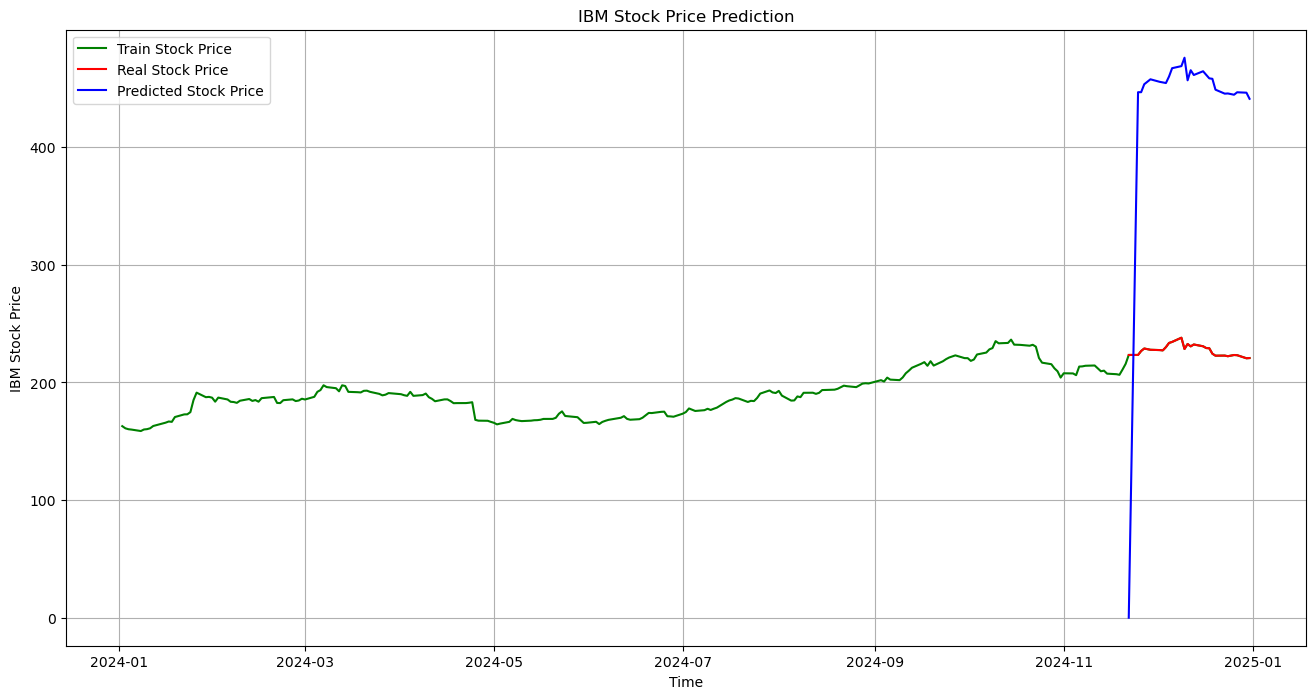

In [16]:
# plot the ARMA model using def arma(data, p, q)
plt.figure(figsize=(16,8))
plt.plot(IBM_stock_data.index[-600:], IBM_stock_data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, arma(y, 1, 1), color = 'blue', label = 'Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arma_model.pdf')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -602.087
Date:                Sun, 05 Jan 2025   AIC                           1216.174
Time:                        00:34:22   BIC                           1237.350
Sample:                             0   HQIC                          1224.695
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.5029     13.149     14.716      0.000     167.731     219.275
ar.L1          1.7524      0.235      7.469      0.000       1.293       2.212
ar.L2         -0.7555      0.232     -3.252      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


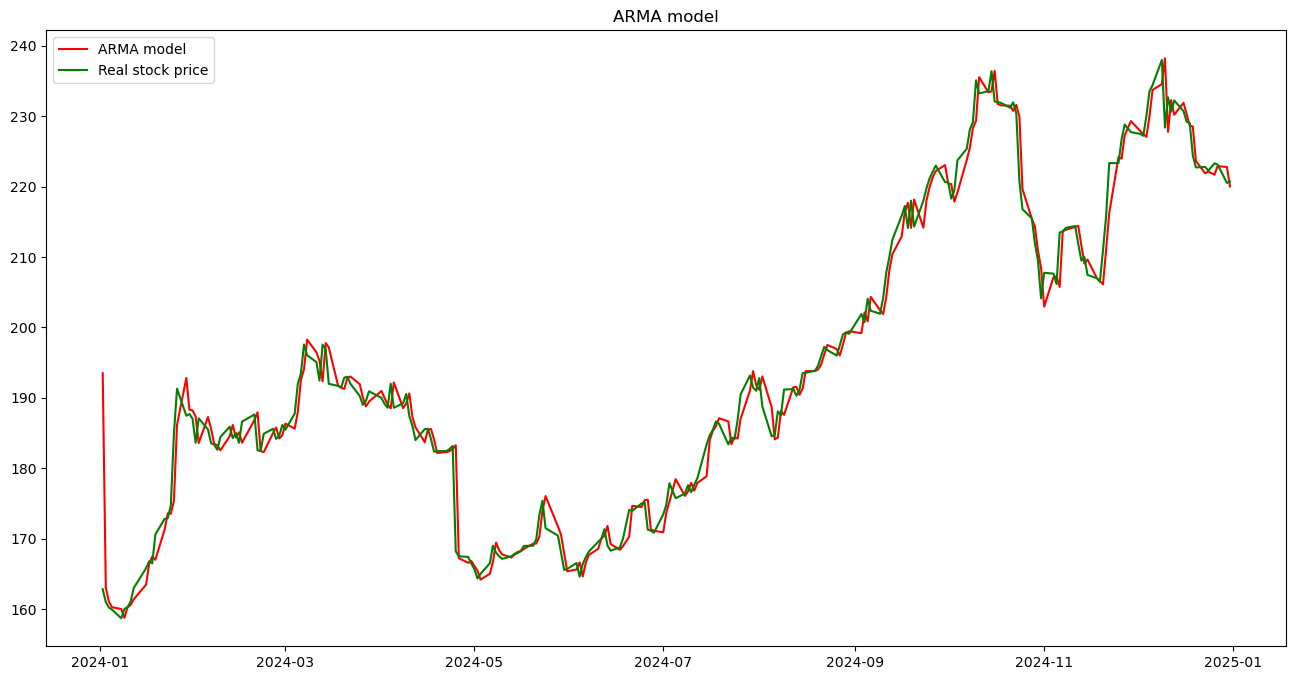

In [17]:
import statsmodels.api as sm

# ARMA model
arma_model = sm.tsa.ARIMA(IBM_stock_data['Open'], order=(2, 0, 2)).fit()
print(arma_model.summary())

# Plot the ARMA model
plt.figure(figsize=(16,8))
plt.plot(arma_model.fittedvalues, color='red', label='ARMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('ARMA model')
plt.legend()
plt.show()


# ARIMA model

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  252
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -598.099
Date:                Sun, 05 Jan 2025   AIC                           1206.197
Time:                        00:34:22   BIC                           1223.824
Sample:                             0   HQIC                          1213.291
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0252      1.287     -0.020      0.984      -2.547       2.497
ar.L2          0.5931      0.822      0.721      0.471      -1.018       2.204
ma.L1          0.1224      1.270      0.096      0.9

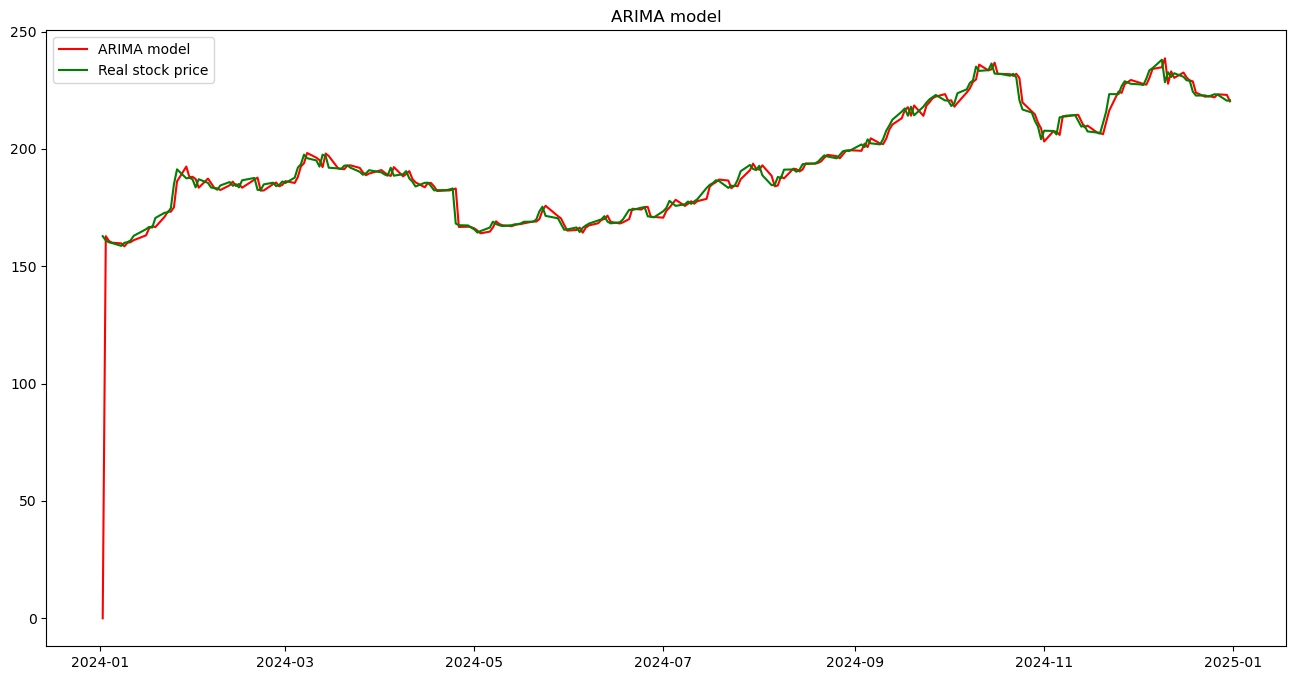

In [18]:
# ARIMA model
arima_model = sm.tsa.ARIMA(IBM_stock_data['Open'], order=(2, 1, 2)).fit()
print(arima_model.summary())

#plot the ARIMA model
plt.figure(figsize=(16,8))
plt.plot(arima_model.fittedvalues, color='red', label='ARIMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('ARIMA model')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44066D+00    |proj g|=  9.55908D-02

At iterate    5    f=  2.33576D+00    |proj g|=  1.08012D-02

At iterate   10    f=  2.33421D+00    |proj g|=  1.42563D-03

At iterate   15    f=  2.33404D+00    |proj g|=  2.23398D-04

At iterate   20    f=  2.33404D+00    |proj g|=  6.86675D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     26      1     0     0   2.331D-06   2.334D+00
  F =   2.3340336895796430     

CONVERG

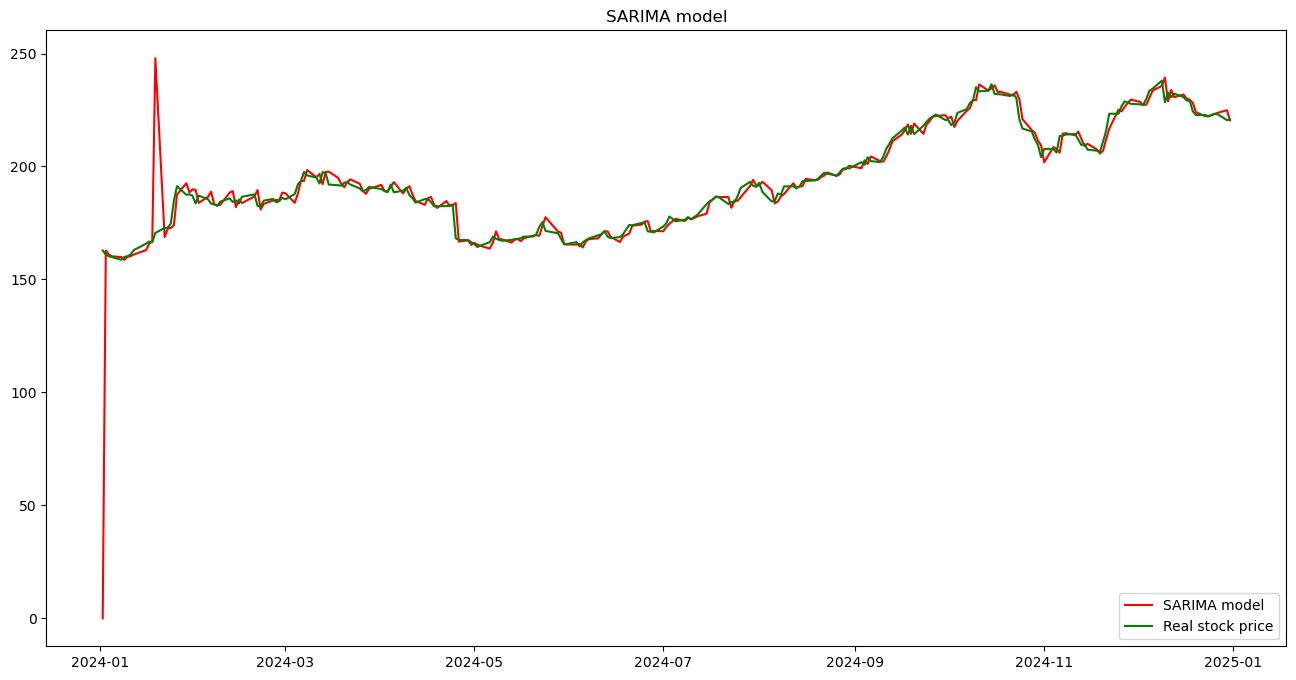

In [19]:
# SARIMA model 
sarima_model = sm.tsa.SARIMAX(IBM_stock_data['Open'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_model.summary())

#plot the SARIMA model
plt.figure(figsize=(16,8))
plt.plot(sarima_model.fittedvalues, color='red', label='SARIMA model')
plt.plot(IBM_stock_data['Open'], color='green', label='Real stock price')
plt.title('SARIMA model')
plt.legend()
plt.show()
